# Linear Optimization - Assignment 4

Name 1 : Ahmik Virani <br>
Roll Number 1 : ES22BTECH11001

Name 2 : Divya Rajparia <br>
Roll Number 2 : ES22BTECH11013

Take input from the CSV file

In [ ]:
import csv
import numpy as np
import pandas as pd

df = pd.read_csv('Testcase.csv', header=None)
df = df.dropna(axis=1, how='all')

u = df.iloc[0, :].astype(int).to_list()
v = df.iloc[1, :].astype(int).to_list()
w = df.iloc[2, :].astype(float).to_list()

no_of_edges = len(w)

for i in range(no_of_edges):
  print(f"Edge from {u[i]} to {v[i]} with weight {w[i]}")

Edge from 0 to 1 with weight 10.0
Edge from 0 to 1 with weight 2.0
Edge from 0 to 5 with weight 1.0
Edge from 2 to 5 with weight 7.0
Edge from 2 to 5 with weight 3.0


In [ ]:
set_of_vertices = set(u) | set(v)
# number_of_vertices = len(set_of_vertices)
number_of_vertices = max(max(u), max(v))
print(number_of_vertices)

5


In [ ]:
# Let us make an adjacency list
# We are following 1-based indexing
adj = [[] for i in range(number_of_vertices + 1)]
for i in range(no_of_edges):
  adj[u[i]].append(v[i])
  adj[v[i]].append(u[i])

 - First check if a perfect matching exists
 - In class we saw that, if an augmented path exists in a matching, then it is not maximum matching
 - We can use this fact and keep growing our matching till we reach maximum matching
 - If the maximum matching covers all the vertices, then it is a perfect matching

In [ ]:
def search_matching(adj, vertex, seen, M):
  # Check if there is an edge to this vertex
  for v in adj[vertex]:
    # Also ensure that it is not part of matching already
    if v not in seen:
      seen.add(v)
      # If v is free OR if v can form another alternate path
      # Then we include this in the matching
      if M[v] < 0 or search_matching(adj, M[v], seen, M):
        M[v] = vertex
        return True
  return False



# Initially we start with empty matching
M = [-1 for i in range(number_of_vertices + 1)]

number_in_matching = 0
for vertex in set(u):
  # We check if we can get a matching from the current vertex
  seen = set()
  if search_matching(adj, vertex, seen, M):
    number_in_matching += 1

print(number_in_matching)

2


In [ ]:
if number_in_matching == len(set(u)):
  print("Perfect matching exists")
else:
  print("No perfect matching exists")

Perfect matching exists


 - Graph G has 2 partitions U and V.
 - If |U| does not equal |V | then dummy edges with a large weight are added to make the partitions equal in size
 - Let this graph be G'. This ensures that
G' has perfect matching between U and V.

In [ ]:
left_vertices = set(u)
right_vertices = set(v)

original_left = left_vertices.copy()
original_right = right_vertices.copy()

In [ ]:
# Let us update u, v, w to the new set
index = number_of_vertices + 1

# Let C denote the maximum weight
C = max(w)

if len(left_vertices) > len(right_vertices):
  # Then we add dummy edges
  for i in range(len(left_vertices) - len(right_vertices)):
    right_vertices.add(index)
    # Add an edge to all the vertices in u
    for left_vertex in left_vertices:
      print(f"Adding dummy edge (u, v, w): {left_vertex}, {index}, {C * number_of_vertices}")
      u.append(left_vertex)
      v.append(index)
      w.append(C * number_of_vertices)
    index += 1
elif len(left_vertices) < len(right_vertices):
  # Then we add dummy edges
  for i in range(len(right_vertices) - len(left_vertices)):
    left_vertices.add(index)
    # Add an edge to all the vertices in u
    for right_vertex in right_vertices:
      print(f"Adding dummy edge (u, v, w): , {index}, {right_vertex}, {C * number_of_vertices}")
      u.append(index)
      v.append(right_vertex)
      w.append(C * number_of_vertices)
    index +=1

The primal problem can be written an follows

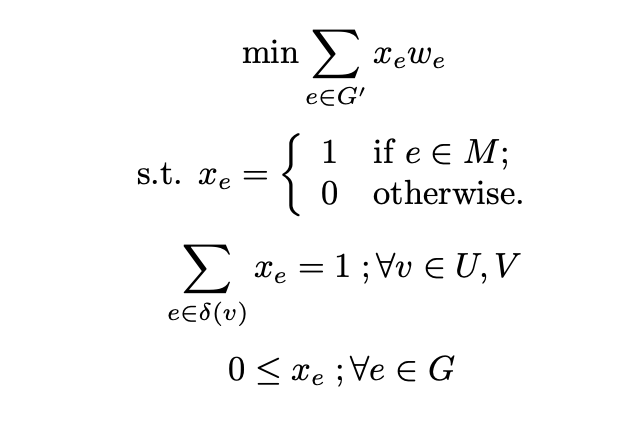

The Dual Problem,

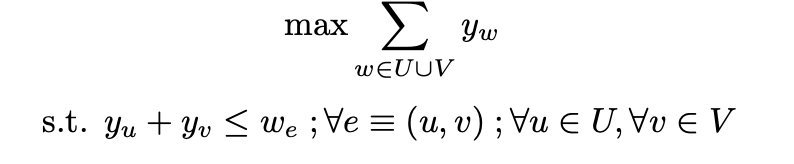

In [ ]:
# In the dual space, each vertex is a variable
# Let us first make the cost matrix

# Now we have our new graph G'
# number_of_vertices = len(set(u) | set(v))
number_of_vertices = max(max(u), max(v))

# The objective is sum of all the new variables
C = [1 for i in range(number_of_vertices)]

In [ ]:
# For each edge (u-v with weight w) in our primal problem, we have y_u + y_v <= w
# Thus let us start with a feasable dual solution
# All zeros will satisfy the above

y_left = {u_i: 0 for u_i in left_vertices}
y_right = {v_i: 0 for v_i in right_vertices}

In [ ]:
# But it is better to make some rows tight from now
# So let us assign each vertex of y_left with its minimum outgoing weight
for u_i in left_vertices:
  min_w = min(w[k] for k in range(len(u)) if u[k] == u_i)
  y_left[u_i] = min_w

Pseudocode

```
 1. Start with a dual solution
 2. until perfect matching found in subgraph of tight edges do
 3.     if tight edges have no perfect matching then
 4.         find Hall set and modify dual values accordingly, expanding the subgraph
 5. endif
 ```

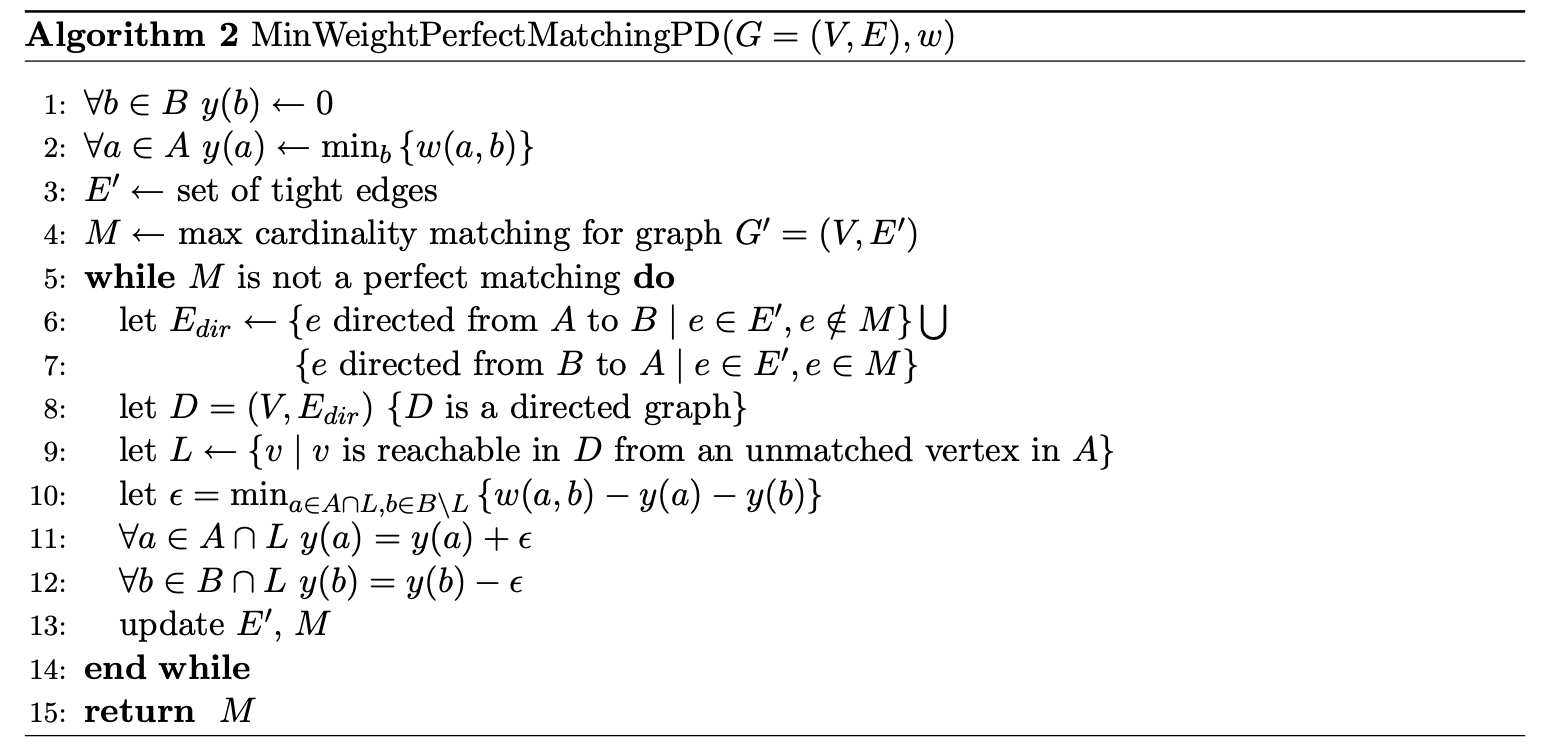

My code has taken inspiration from the above, but not followed it blindly

Reference : https://courses.grainger.illinois.edu/cs598csc/sp2010/Lectures/Lecture10.pdf

In [ ]:
# Let us call tight as the set of tight edges
def find_tight(u, v, w, y_left, y_right):
  tight = {x: [] for x in y_left.keys() | y_right.keys()}
  # We will go through all the edges
  for i in range(len(u)):
    u_i = u[i]
    v_i = v[i]
    # Check if tight
    if abs(y_left[u_i] + y_right[v_i] - w[i]) < 1e-9:
      tight[u_i].append(v_i)
      tight[v_i].append(u_i)
  return tight

In [ ]:
while True:
  print("y_left: ", end='')
  for index, value in y_left.items():
      print(f"({index}: {value:.2f})", end=' ')
  print()

  print("y_right: ", end='')
  for index, value in y_right.items():
      print(f"({index}: {value:.2f})", end=' ')
  print()
  print("-" * 50)

  tight = find_tight(u, v, w, y_left, y_right)
  M = [-1 for _ in range(number_of_vertices + 1)]
  number_in_matching = 0
  for vertex in set(u):
    seen = set()
    if search_matching(tight, vertex, seen, M):
      number_in_matching += 1

  if number_in_matching == len(left_vertices):
    print("Perfect matching found in subgraph of tight edges")
    break

  # Find S and N(S)
  unmatched_left = [u_i for u_i in left_vertices if all(M[v_j] != u_i for v_j in right_vertices)]
  S = set()
  NS = set()
  stack = unmatched_left.copy()
  while stack:
    u_i = stack.pop()
    if u_i in S:
      continue
    S.add(u_i)
    for v_i in tight[u_i]:
      NS.add(v_i)
      if M[v_i] != -1 and M[v_i] not in S:
        stack.append(M[v_i])

  not_NS = [v_i for v_i in right_vertices if v_i not in NS]

  # Compute delta
  delta = float('inf')
  for i in range(len(u)):
    if u[i] in S and v[i] in not_NS:
      slack = w[i] - (y_left[u[i]] + y_right[v[i]])
      delta = min(delta, slack)

  # Update dual variables
  for u_i in S:
    y_left[u_i] += delta
  for v_i in NS:
    y_right[v_i] -= delta

final_edges = []
total_cost = 0
for i in range(len(u)):
    if M[v[i]] == u[i]:
        if u[i] in original_left and v[i] in original_right:
            final_edges.append((u[i], v[i], w[i]))
            total_cost += w[i]

print("Final Edges: (u, v, w) ", final_edges)
print("Total Weight of Matching:", total_cost)

y_left: (0: 1.00) (2: 3.00) 
y_right: (1: 0.00) (5: 0.00) 
--------------------------------------------------
y_left: (0: 2.00) (2: 4.00) 
y_right: (1: 0.00) (5: -1.00) 
--------------------------------------------------
Perfect matching found in subgraph of tight edges
Final Edges: (u, v, w)  [(0, 1, 10.0), (0, 1, 2.0), (2, 5, 7.0), (2, 5, 3.0)]
Total Weight of Matching: 22.0


### Displaying the answer

In [ ]:
print("Final Edges: (u, v, w) ", final_edges)
print("Total Weight of Matching:", total_cost)

Final Edges: (u, v, w)  [(0, 1, 10.0), (0, 1, 2.0), (2, 5, 7.0), (2, 5, 3.0)]
Total Weight of Matching: 22.0
